# Emergency Vehicle Vs Non Emergency Vehicle from Scratch using CNN

In [ ]:
# If autocompletion does not works , 
%config Completer.use_jedi = False

In [31]:
#define the necessary libraries 
import tensorflow as tf 

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

from keras.models import Sequential
from keras.layers import InputLayer, Dense, BatchNormalization, Conv2D, MaxPool2D, Dropout, Flatten
from keras.optimizers import RMSprop, Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

## 1. Load the DataSet

In [6]:
data = pd.read_csv("Dataset/emergency_classification.csv")

In [7]:
data.head()

,image_names,emergency_or_not
0,0.jpg,1
1,1.jpg,1
2,2.jpg,1
3,3.jpg,1
4,4.jpg,1


In [25]:

test_image = plt.imread("Dataset/images/0.jpg")
test_image.shape

(224, 224, 3)

In [12]:
#load the images 

X = []
for image_name in data.image_names:
    image = plt.imread("Dataset/images/"+image_name)
    X.append(image)

X = np.array(X)

y = data.emergency_or_not.values

## 2. Preprocessing the data 

In [13]:
X = X / X.max()

## 3 Creating the training and Validation set 

In [16]:
X_train, X_valid, y_train, y_valid = train_test_split( X, y, test_size=0.3 )

In [17]:
(X_train.shape, y_train.shape), (X_valid.shape, y_valid.shape)

(((1646, 224, 224, 3), (1646,)), ((706, 224, 224, 3), (706,)))

## 4 Defining the model architecture

In [48]:
model = Sequential()

model.add(InputLayer(input_shape=(224,224,3)))
model.add(Conv2D(20,(5,5), activation='relu', strides=(1,1), padding='same'))
model.add(MaxPool2D( pool_size=(4,4), padding='same'))
model.add(Conv2D(30, (5,5), activation='relu', strides=(1,1), padding='same'))
model.add(MaxPool2D( pool_size=(4,4), padding='same'))

model.add(Flatten())
model.add(Dense(units=100, activation='sigmoid'))
model.add(BatchNormalization())
model.add(Dropout(rate=0.6))
model.add(Dense(units=1, activation='sigmoid'))




In [49]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 224, 224, 20)      1520      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 56, 56, 20)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 56, 56, 30)        15030     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 30)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 5880)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 100)               588100    
_________________________________________________________________
batch_normalization_2 (Batch (None, 100)              

## 5 Compile the model 

In [50]:
#rsmProp = RMSprop(0.001=1e-07, learning_rate=0.001)
model.compile(loss='binary_crossentropy', optimizer='RMSprop', metrics=['accuracy'])

## 6 Train the model


In [51]:
early_stopping = EarlyStopping( monitor="val_loss", min_delta=0.01 , patience=5, mode="min")
filepath = "weights.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor="val_accuracy", verbose=1, save_best_only=True, mode="max")
callback_list= [early_stopping, checkpoint]

In [52]:
model_result = model.fit( X_train, y_train, epochs=10, batch_size=128,validation_data=(X_valid, y_valid), callbacks=callback_list)

Epoch 1/10
13/13 [==============================] - ETA: 0s - loss: 0.6873 - accuracy: 0.7060
Epoch 00001: val_accuracy improved from -inf to 0.58782, saving model to weights.hdf5
13/13 [==============================] - 20s 2s/step - loss: 0.6873 - accuracy: 0.7060 - val_loss: 0.7735 - val_accuracy: 0.5878
Epoch 2/10
13/13 [==============================] - ETA: 0s - loss: 0.3834 - accuracy: 0.8335
Epoch 00002: val_accuracy did not improve from 0.58782
13/13 [==============================] - 21s 2s/step - loss: 0.3834 - accuracy: 0.8335 - val_loss: 0.7687 - val_accuracy: 0.5878
Epoch 3/10
13/13 [==============================] - ETA: 0s - loss: 0.3154 - accuracy: 0.8633
Epoch 00003: val_accuracy did not improve from 0.58782
13/13 [==============================] - 20s 2s/step - loss: 0.3154 - accuracy: 0.8633 - val_loss: 0.7256 - val_accuracy: 0.5878
Epoch 4/10
13/13 [==============================] - ETA: 0s - loss: 0.2407 - accuracy: 0.9070
Epoch 00004: val_accuracy did not improve

In [53]:
print("Accuracy on the training set ", accuracy_score(y_train, model.predict_classes(X_train)), "%")

Accuracy on the training set  0.7739975698663426 %


In [54]:
print("Accuracy on the validation set ", accuracy_score(y_valid, model.predict_classes(X_valid)),"%")

Accuracy on the validation set  0.7379603399433428 %


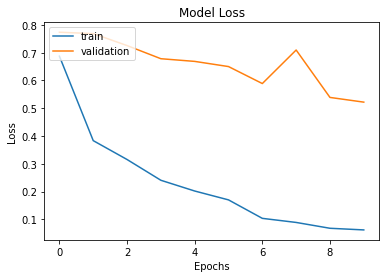

In [55]:
# plot the history for loss
plt.plot(model_result.history["loss"])
plt.plot(model_result.history["val_loss"])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['train','validation'], loc="upper left")
plt.show()

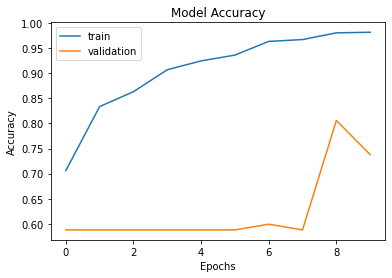

In [56]:
# plot the history for loss
plt.plot(model_result.history["accuracy"])
plt.plot(model_result.history["val_accuracy"])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train','validation'], loc="upper left")
plt.show()